<a href="https://colab.research.google.com/github/slegro97/imdb-analysis/blob/main/IMDb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data

In [ ]:
%cd /content/drive/MyDrive/PythonProjects/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!

/content/drive/MyDrive/PythonProjects/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Data
data = pd.read_csv('imdb.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Data Preparation and Cleaning

In [ ]:
# Isolate desired variables
df = data[['IMDB_Rating',
           'Released_Year',
           'Runtime',
           'Meta_score',
           'Gross',
           'Director']]
df. head()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director
0,9.3,1994,142 min,80.0,"28,341,469",Frank Darabont
1,9.2,1972,175 min,100.0,"134,966,411",Francis Ford Coppola
2,9.0,2008,152 min,84.0,"534,858,444",Christopher Nolan
3,9.0,1974,202 min,90.0,"57,300,000",Francis Ford Coppola
4,9.0,1957,96 min,96.0,"4,360,000",Sidney Lumet


In [ ]:
# Look at df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Rating    1000 non-null   float64
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Meta_score     843 non-null    float64
 4   Gross          831 non-null    object 
 5   Director       1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [ ]:
# Adjust data types
df['Released_Year'] = pd.to_numeric(df['Released_Year'],  # Convert Released_Year to numeric
                                    errors = 'coerce')

<ipython-input-94-e1ad31192226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year'] = pd.to_numeric(df['Released_Year'],  # Convert Released_Year to numeric


In [ ]:
# Check row 966
df.iloc[966]

,966
IMDB_Rating,7.6
Released_Year,NaN
Runtime,140 min
Meta_score,77.0
Gross,"173,837,933"
Director,Ron Howard


In [ ]:
# Create a decade variable
df['Decade'] = np.floor(df['Released_Year'] / 10) * 10

<ipython-input-96-f50fa50517d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = np.floor(df['Released_Year'] / 10) * 10


In [ ]:
# Convert and transform Runtime
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

<ipython-input-97-778bd5b1b2e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)


In [ ]:
# Fill NaN values with zero
df['Gross'] = df['Gross'].fillna(0)
print(df['Gross'].isna().sum())

0


<ipython-input-98-a7039bd1c126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].fillna(0)


In [ ]:
# Convert and transform Gross variable
df['Gross'] = df['Gross'].str.replace(',', '').fillna(0).astype(int)

<ipython-input-99-16337d0894bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].str.replace(',', '').fillna(0).astype(int)


In [ ]:
# Creating a mil variable for Gross
df['Gross_mil'] = df['Gross'] / 1000000

<ipython-input-100-032d49f33fe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross_mil'] = df['Gross'] / 1000000


In [ ]:
df = df.drop(columns = ['Released_Year', 'Gross'])
df.head()

,IMDB_Rating,Runtime,Meta_score,Director,Decade,Gross_mil
0,9.3,142,80.0,Frank Darabont,1990.0,28.341469
1,9.2,175,100.0,Francis Ford Coppola,1970.0,134.966411
2,9.0,152,84.0,Christopher Nolan,2000.0,534.858444
3,9.0,202,90.0,Francis Ford Coppola,1970.0,57.300000
4,9.0,96,96.0,Sidney Lumet,1950.0,4.360000


# Exploratory Data Analysis

In [ ]:
# Summary Statistics
df.describe()

,IMDB_Rating,Runtime,Meta_score,Decade,Gross_mil
count,1000.000000,1000.000000,843.000000,999.000000,1000.000000
mean,7.949300,122.891000,77.971530,1986.586587,56.536878
std,0.275491,28.093671,12.376099,23.189130,103.238179
min,7.600000,45.000000,28.000000,1920.000000,0.000000
25%,7.700000,103.000000,70.000000,1970.000000,0.445710
50%,7.900000,119.000000,79.000000,1990.000000,10.702751
75%,8.100000,137.000000,87.000000,2000.000000,61.539891
max,9.300000,321.000000,100.000000,2020.000000,936.662225


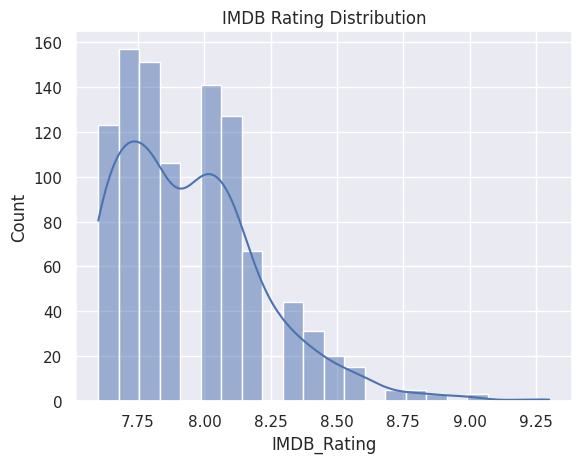

In [ ]:
# Histogram of IMBD Ratings
sns.histplot(df['IMDB_Rating'], kde = True)
plt.title('IMDB Rating Distribution')
plt.show()

In [ ]:
# Study the top 10 directors with the highest avg IMDB rating
director_ratings = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending = False).head(10)

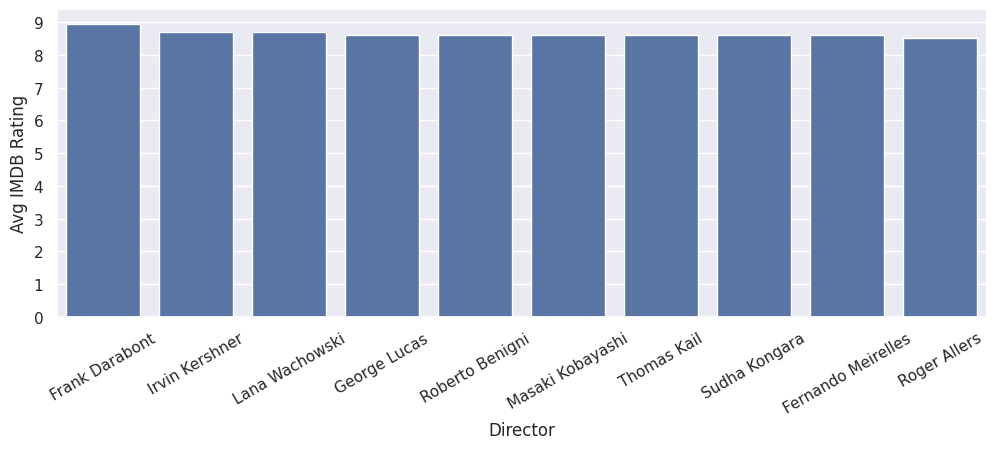

In [ ]:
# Visualize the IMDB ratings for the top 10 directors
plt.figure(figsize = (12, 4))
sns.barplot(x = director_ratings.index,
            y = director_ratings.values)
plt.xticks(rotation = 30)
plt.yticks(np.arange(0, 10, step = 1))
plt.xlabel('Director')
plt.ylabel('Avg IMDB Rating')
plt.show()

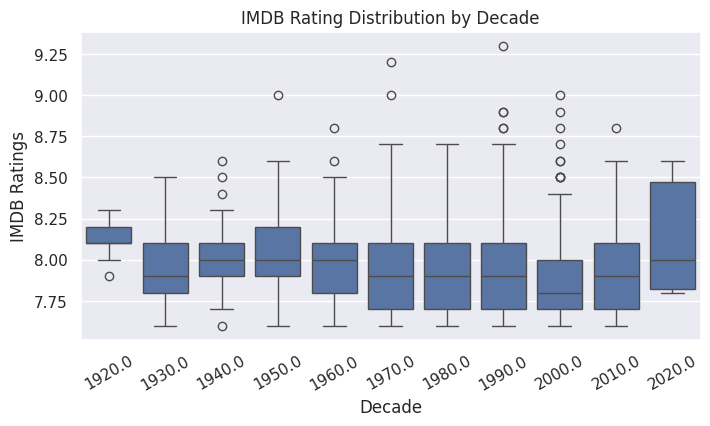

In [ ]:
# Distribution of IMDB ratings by decade
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'Decade',
            y = 'IMDB_Rating',
            data = df)
plt.title('IMDB Rating Distribution by Decade')
plt.xticks(rotation = 30)
plt.xlabel('Decade')
plt.ylabel('IMDB Ratings')
plt.show()


In [ ]:
# Covariance matrix
df_co = df[['Runtime', 'IMDB_Rating', 'Gross_mil', 'Meta_score']]
df_co.cov()

,Runtime,IMDB_Rating,Gross_mil,Meta_score
Runtime,789.254373,1.881455,417.438934,-10.526302
IMDB_Rating,1.881455,0.075895,2.343023,0.942946
Gross_mil,417.438934,2.343023,10658.121703,-72.676259
Meta_score,-10.526302,0.942946,-72.676259,153.167835


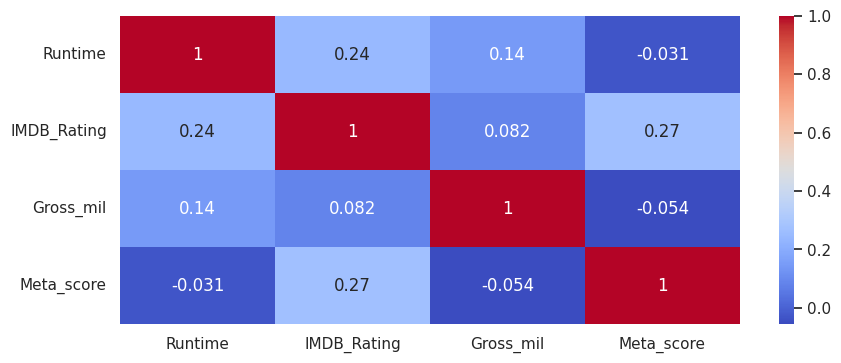

In [ ]:
# Correlation Heatmap
plt.figure(figsize = (10, 4))
sns.heatmap(df_co.corr(),
            annot = True,
            cmap = 'coolwarm')
plt.show()

# Estimating Average Ratings

In [ ]:
# Calculate the mean, SD, and sample size
summary = df.groupby('Decade').agg({'Gross_mil': ['mean', 'std', 'count']})

In [ ]:
# Rename the columns
summary.columns = ['Gross_mean', 'Gross_std', 'Gross_count']

In [ ]:
# Calculate the SEM
summary['Gross_SEM'] = summary['Gross_std'] / np.sqrt(summary['Gross_count'])
summary.head()

,Gross_mean,Gross_std,Gross_count,Gross_SEM
Decade,,,,
1920.0,1.341802,2.084388,11,0.628467
1930.0,9.968549,40.300467,24,8.226298
1940.0,4.739121,13.376285,35,2.261005
1950.0,7.846706,17.703398,56,2.365716
1960.0,21.234302,35.304236,73,4.132048


In [ ]:
# Calculate the CI with 95% CL
alpha = 0.05
summary['T_score'] =st.t.ppf(1 - alpha / 2,
                             summary['Gross_count'] - 1)

# Confidence Interval
summary['Lower_CI'] = summary['Gross_mean'] - summary['T_score'] * summary['Gross_SEM']
summary['Upper_CI'] = summary['Gross_mean'] + summary['T_score'] * summary['Gross_SEM']

# Display outcome
summary

,Gross_mean,Gross_std,Gross_count,Gross_SEM,T_score,Lower_CI,Upper_CI
Decade,,,,,,,
1920.0,1.341802,2.084388,11,0.628467,2.228139,-0.058509,2.742113
1930.0,9.968549,40.300467,24,8.226298,2.068658,-7.048845,26.985944
1940.0,4.739121,13.376285,35,2.261005,2.032245,0.144207,9.334036
1950.0,7.846706,17.703398,56,2.365716,2.004045,3.105705,12.587706
1960.0,21.234302,35.304236,73,4.132048,1.993464,12.997214,29.471390
1970.0,41.051211,61.715373,76,7.079239,1.992102,26.948645,55.153778
1980.0,56.013362,78.126921,89,8.281437,1.987290,39.555746,72.470978
1990.0,57.147999,92.390192,150,7.543628,1.976013,42.241692,72.054307
2000.0,63.191930,102.460660,237,6.655535,1.970067,50.080081,76.303779


# Conclusions

1) The avg movie duration for is 123 min

2) Frank Darabont makes the highest rated movies, on average

3) 2000 has the most outliers for movie ratings

4) Runtime has a positive relationship with IMDB rating, but no relationship with Meta score

5) Either people prefer recent movies, or recent movies have higher quality

6) In the decade of 2020, the mean Gross earnings for films is expectred to surpass 100 mil